<a href="https://colab.research.google.com/github/zj71/Computer-Vision/blob/main/%E2%80%9CCV_Lab_Session_7_Solutions_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
This lab is a brief demonstration of the [YOLO](https://pjreddie.com/darknet/yolo/) object detection method that we covered previously. Object detection systems are pretty complicated to build and train, so this lab instead just shows you what you might expect from the output and how you might analyse it.

# Preparation
We also install [cvlib](https://github.com/arunponnusamy/cvlib/tree/master/cvlib) a lightweight python library that can load the pre-trained YOLO model into opencv and run it.

In [ ]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 11.1MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-cp37-none-any.whl size=10044621 sha256=6b7d10c36ac4bb8f52921c93760b7ba4da761f337c8cce8aa9fcfa4b3c1c99bb
  Stored in directory: /root/.cache/pip/wheels/5e/a4/99/8dfcae03a6f93bb4084650d0b642ef5a472429928fb95ffd01
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12076 sha256=e06b4f3ed3ee26a561fb4a21643cfbd250273eae9e303d2a0de2bec8aa754c69
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


We also need to download the pre-trained YOLO model. It's quite large (>200 MB) and to make it faster I'm hosting it on my webspace and copying it to where cvlib would look for it

In [ ]:
from os import makedirs
from cvlib import object_detection as object_detection
makedirs(object_detection.dest_dir)
!wget "http://users.sussex.ac.uk/~is321/yolov3.weights" -O /root/.cvlib/object_detection/yolo/yolov3/yolov3.weights

--2021-03-24 16:57:53--  http://users.sussex.ac.uk/~is321/yolov3.weights
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M)
Saving to: ‘/root/.cvlib/object_detection/yolo/yolov3/yolov3.weights’

/root/.cvlib/object 100%[===================>] 236.52M  15.5MB/s    in 19s     

2021-03-24 16:58:13 (12.2 MB/s) - ‘/root/.cvlib/object_detection/yolo/yolov3/yolov3.weights’ saved [248007048/248007048]



# Getting Data
We are going to download some example images to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.


In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg
!wget "http://users.sussex.ac.uk/~is321/lib_center.jpg" -O lib.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!wget "/content/drive/My Drive/CVLab/1.jpg" -O 1.jpg

/content/drive/My Drive/CVLab/1.jpg: Scheme missing.


# Common Packages
As we've seen before there are some common packages that we might want to load. We should also convert any images we load to RGB from BGR


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img_mh = cv2.imread('./meeting_house.jpg')
img_mh = cv2.cvtColor(img_mh, cv2.COLOR_BGR2RGB)

img_lib = cv2.imread('./lib.jpg')
img_lib = cv2.cvtColor(img_lib, cv2.COLOR_BGR2RGB)



In [ ]:

img1 = cv2.imread('./1.jpg')
img1 = cv2.cvtColor(img_lib, cv2.COLOR_BGR2RGB)

# Running YOLO
Using the cvlib's [object_detection](https://github.com/arunponnusamy/cvlib/blob/master/cvlib/object_detection.py) functions we can easily load the model and run it on an image. Use the function "detect_common_objects" and look at what the function is doing. If you want to learn in more detail about what all the bits are, then take a look at this [tutorial](https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/).
1. Run the object detector on my images and some of your own. For now we'll use the cvlib function object_detection.draw_bbox function to visualise the output.
2. Experiment with the confidence and non-maximum supressession threshold (nms_thresh) how do these affect the results that you see? Take a look at the code in the [object_detection file](https://github.com/arunponnusamy/cvlib/blob/master/cvlib/object_detection.py) to see how the confidence/nms_thresh are used.



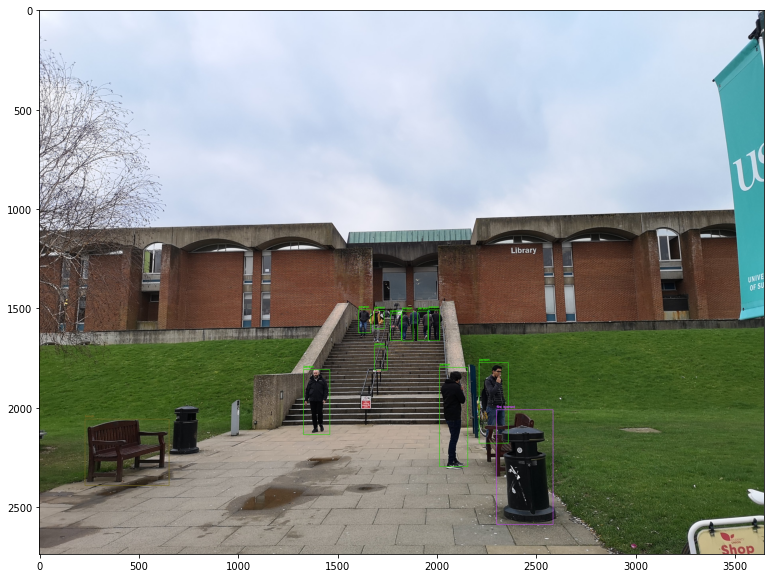

In [ ]:
# Inserted some magic code to make the figures slightly larger, these numbers can be tweaked
plt.rcParams['figure.figsize'] = [20, 10]

# Run the YOLO object detector on the image! 
bbox, label, conf = object_detection.detect_common_objects(img_lib, confidence=0.35, nms_thresh=0.3, model='yolov3', enable_gpu=False)

output_image = object_detection.draw_bbox(np.copy(img_lib), bbox, label, conf)
plt.imshow(output_image)
plt.show()


# Analysing the predictions
1. Look at the code below in draw_bbox_new, which is an adapted version of the function for drawing the bounding boxes in [object_detection.py](https://github.com/arunponnusamy/cvlib/blob/master/cvlib/object_detection.py). Make a modified version that displays the confidence of the predictions by the thickness of the lines in the box. Look at a few images, does it ever seem over/under confident when it shouldn't be?
2. For each detected object, crop it out and display it in a new image by itself with the name and confidence written on it. Does this change your opinion on the accuracy of the confidence estimates?


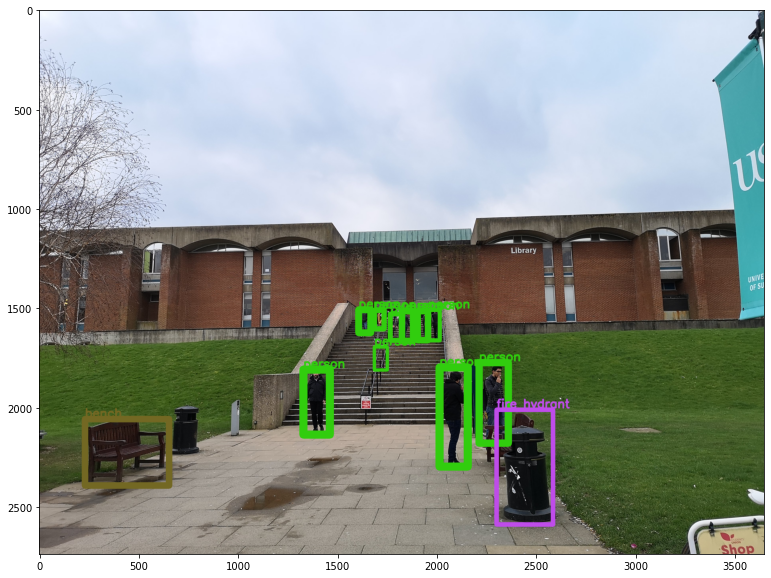

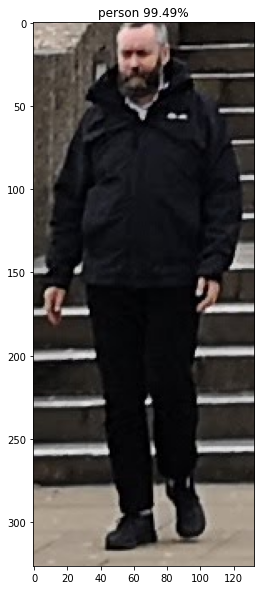

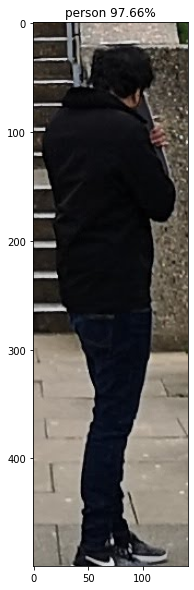

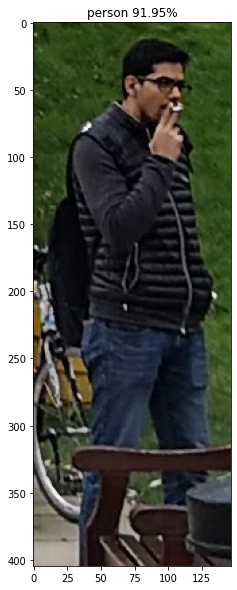

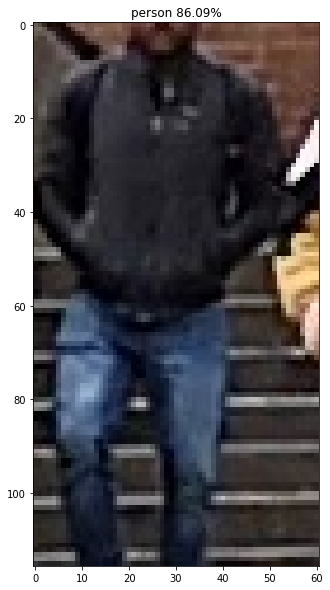

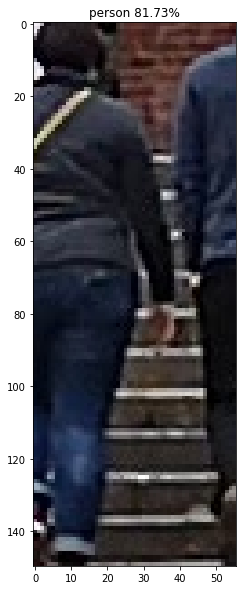

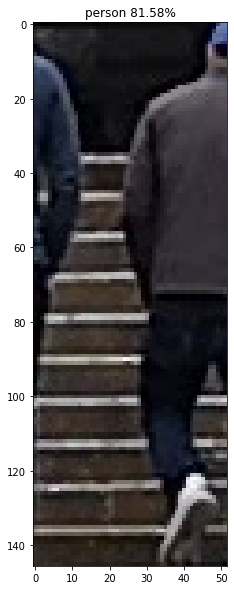

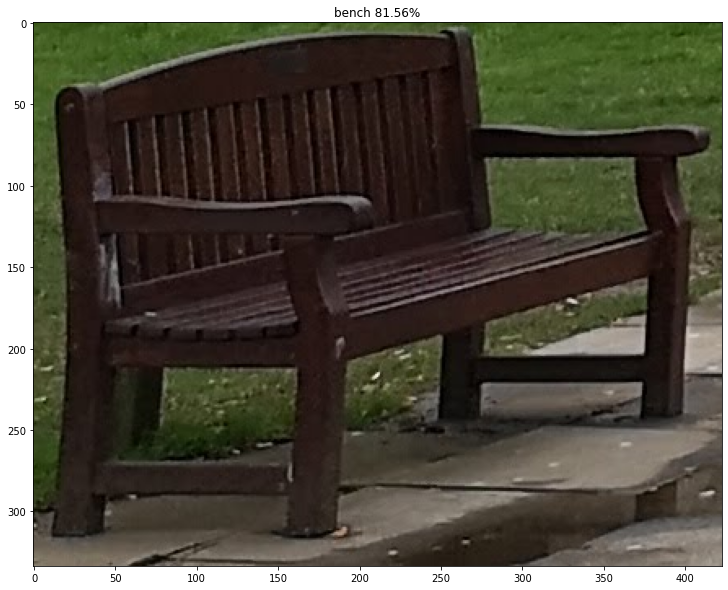

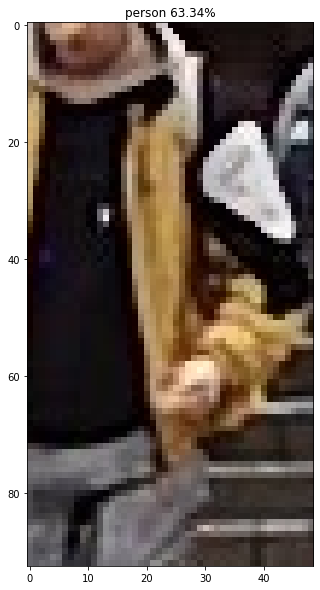

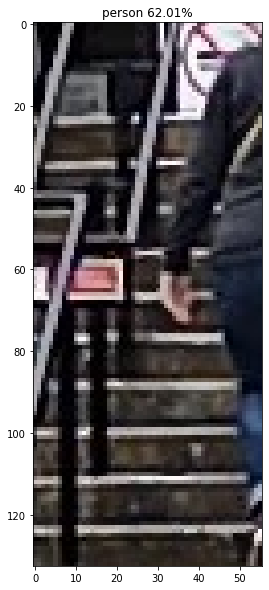

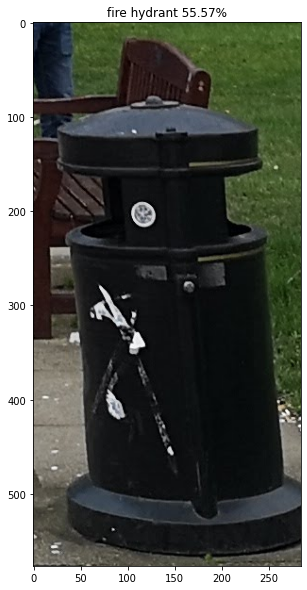

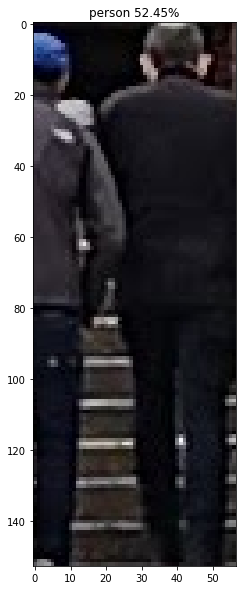

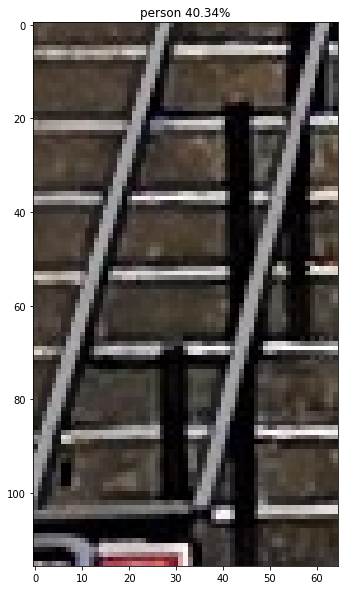

In [ ]:
def draw_bbox_new(img, bbox, labels, confidence):
  """
  Adapted from cvlib.object_detection.draw_bbox
  """
  classes = object_detection.classes
  if classes is None:
    classes = object_detection.populate_class_labels()

  # Copy the image so we don't accidentally edit it
  img = np.copy(img)
  colors = object_detection.COLORS
  for i, label in enumerate(labels):
    color = colors[classes.index(label)]
    # We need to draw the rectangle in the right place with the right thickness
    cv2.rectangle(img, (bbox[i][0],bbox[i][1]), (bbox[i][2],bbox[i][3]), color, int(confidence[i]*40))
    # Maybe change the fontScale/thickness to make it more readable
    cv2.putText(img, label, (bbox[i][0],bbox[i][1]-10), cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=color, thickness=8)
  return img

# Test it out
output_image = draw_bbox_new(img_lib, bbox, label, conf)
plt.imshow(output_image)
plt.show()


def cut_out_objects(img, bbox, labels, confidence):
  # Copy the image so we don't accidentally edit it
  img = np.copy(img)
  # We need to go through all the detected objects and crop out the object into
  # a new numpy array and then draw it using matplotlib and give it a title of
  # object_type and confdence 
  for i, label in enumerate(labels):
    cropped_image = img[bbox[i][1]:bbox[i][3],bbox[i][0]:bbox[i][2],:]
    label += ' ' + str(format(confidence[i] * 100, '.2f')) + '%'
    plt.imshow(cropped_image)
    plt.title(label)
    plt.show()
    
# Test it out
cut_out_objects(img_lib, bbox, label, conf)

# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Pick an image with people in, such as the image of the library, img_lib. By making some simple assumptions, can you estimate the distance of each person from the camera?
+ Investigate how the confidence of predictions is affected by image noise. Use np.random.randn to add noise to the image.


